<a href="https://www.kaggle.com/code/hritickroyai/inverse-kinematics-using-neural-network?scriptVersionId=165217039" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense, SimpleRNN
from tensorflow.keras.optimizers import Adam

In [2]:
data = np.loadtxt("../input/robot-kinematics-dataset/robot_inverse_kinematics_dataset.csv", skiprows=1, delimiter=',')
print(data.shape)
print(type(data))

(15000, 9)
<class 'numpy.ndarray'>


In [3]:
# Load the CSV file

# Split the input and output variables
q = data[:, :6] # Joint angles
xyz = data[:, 6:] # End-effector position
q=np.degrees(q)
# Split data into training and validation sets
q_train, q_val, xyz_train, xyz_val = train_test_split(q, xyz, test_size=0.2, random_state=42) #test_size->20% of the data is used for testing
                                                                                                            #random_state=42 -> we get the same train and test sets across different executions

# Print shapes of training and validation sets
print('Training set shapes:')
print('q_train:', q_train.shape)
print('xyz_train:', xyz_train.shape)

print('\nValidation set shapes:')
print('q_val:', q_val.shape)
print('xyz_val:', xyz_val.shape)

Training set shapes:
q_train: (12000, 6)
xyz_train: (12000, 3)

Validation set shapes:
q_val: (3000, 6)
xyz_val: (3000, 3)


In [4]:
# Define the LSTM network architecture
model = Sequential([
    LSTM(64, activation='relu', input_shape=(1,3)),  # LSTM layer with 64 units
    Dense(64, activation='relu'),  # Dense layer with 64 units
    Dense(6)  # Output layer for joint configurations
])


# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam',metrics=['accuracy'])

# Train the model
history = model.fit(xyz_train.reshape(xyz_train.shape[0],1, xyz_train.shape[1]),
                            q_train, 
                            epochs=100, 
                            batch_size=32, 
                            validation_data=(xyz_val.reshape(xyz_val.shape[0],1, xyz_val.shape[1]), q_val))


Epoch 1/100
375/375 [==============================] - 2s 2ms/step - loss: 10212.7920 - accuracy: 0.7002 - val_loss: 6434.3535 - val_accuracy: 0.7033
Epoch 2/100
375/375 [==============================] - 1s 2ms/step - loss: 6299.5420 - accuracy: 0.7038 - val_loss: 6308.0312 - val_accuracy: 0.7033
Epoch 3/100
375/375 [==============================] - 1s 2ms/step - loss: 6264.7646 - accuracy: 0.7038 - val_loss: 6290.1665 - val_accuracy: 0.7033
Epoch 4/100
375/375 [==============================] - 1s 2ms/step - loss: 6246.2227 - accuracy: 0.7038 - val_loss: 6275.1553 - val_accuracy: 0.7033
Epoch 5/100
375/375 [==============================] - 1s 2ms/step - loss: 6231.9238 - accuracy: 0.7038 - val_loss: 6267.6265 - val_accuracy: 0.7033
Epoch 6/100
375/375 [==============================] - 1s 2ms/step - loss: 6223.4209 - accuracy: 0.7038 - val_loss: 6262.6807 - val_accuracy: 0.7033
Epoch 7/100
375/375 [==============================] - 1s 2ms/step - loss: 6216.8179 - accuracy: 0.7038 -

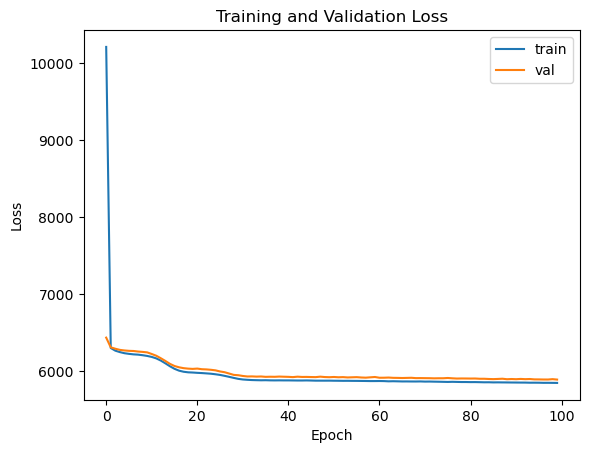

In [5]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [6]:
# Define the FNN network architecture
model_fnn = Sequential()
model_fnn.add(Dense(64, input_dim=3, activation='relu'))
model_fnn.add(Dense(32, activation='relu'))
model_fnn.add(Dense(16, activation='relu'))
model_fnn.add(Dense(6))

# Compile the model
model_fnn.compile(loss='mean_squared_error', optimizer='adam',metrics=['accuracy'])

# Train the model
history_fnn = model_fnn.fit(xyz_train, q_train, 
                            epochs=100, 
                            batch_size=32, 
                            validation_data=(xyz_val, q_val))

# Evaluate the model
loss_fnn = model_fnn.evaluate(xyz_val, q_val, verbose=0)
print("FNN validation loss:", loss_fnn)

Epoch 1/100
375/375 [==============================] - 1s 2ms/step - loss: 8767.1211 - accuracy: 0.4077 - val_loss: 6293.3154 - val_accuracy: 0.7033
Epoch 2/100
375/375 [==============================] - 1s 1ms/step - loss: 6245.5786 - accuracy: 0.7038 - val_loss: 6276.8740 - val_accuracy: 0.7033
Epoch 3/100
375/375 [==============================] - 1s 1ms/step - loss: 6233.0352 - accuracy: 0.7038 - val_loss: 6268.1587 - val_accuracy: 0.7033
Epoch 4/100
375/375 [==============================] - 1s 1ms/step - loss: 6222.3618 - accuracy: 0.7038 - val_loss: 6268.4858 - val_accuracy: 0.7033
Epoch 5/100
375/375 [==============================] - 1s 1ms/step - loss: 6219.6699 - accuracy: 0.7038 - val_loss: 6265.6055 - val_accuracy: 0.7033
Epoch 6/100
375/375 [==============================] - 1s 1ms/step - loss: 6215.8374 - accuracy: 0.7038 - val_loss: 6259.6567 - val_accuracy: 0.7033
Epoch 7/100
375/375 [==============================] - 1s 1ms/step - loss: 6206.3315 - accuracy: 0.7038 - 

In [7]:
print("FNN validation loss:", loss_fnn)

FNN validation loss: [5882.255859375, 0.70333331823349]


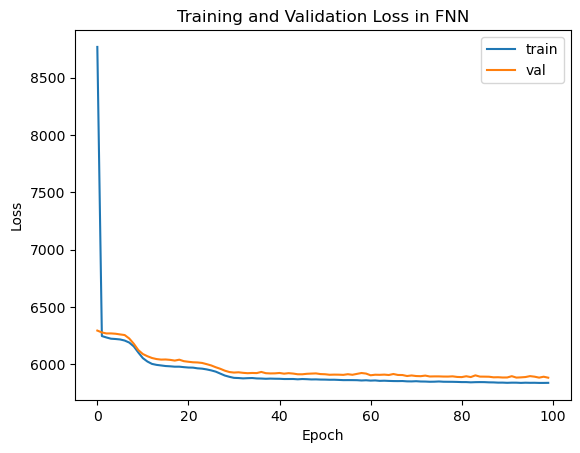

In [8]:
plt.plot(history_fnn.history['loss'], label='train')
plt.plot(history_fnn.history['val_loss'], label='val')
plt.title('Training and Validation Loss in FNN')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [9]:
# Define and train a simple recurrent neural network
rnn_model = Sequential()
rnn_model.add(SimpleRNN(64, input_shape=(1,3), activation='relu'))
rnn_model.add(Dense(6))

rnn_model.compile(loss='mean_squared_error', optimizer=Adam(),metrics=['accuracy'])
rnn_history = rnn_model.fit(xyz_train.reshape(xyz_train.shape[0],1, xyz_train.shape[1]),
                            q_train, 
                            epochs=100, 
                            batch_size=32, 
                            validation_data=(xyz_val.reshape(xyz_val.shape[0],1, xyz_val.shape[1]), q_val))

Epoch 1/100
375/375 [==============================] - 2s 2ms/step - loss: 12431.1211 - accuracy: 0.7016 - val_loss: 11432.4424 - val_accuracy: 0.7033
Epoch 2/100
375/375 [==============================] - 1s 2ms/step - loss: 9770.6426 - accuracy: 0.7038 - val_loss: 8339.5645 - val_accuracy: 0.7033
Epoch 3/100
375/375 [==============================] - 1s 2ms/step - loss: 7339.7661 - accuracy: 0.7038 - val_loss: 6753.2119 - val_accuracy: 0.7033
Epoch 4/100
375/375 [==============================] - 1s 1ms/step - loss: 6445.2266 - accuracy: 0.7038 - val_loss: 6340.3555 - val_accuracy: 0.7033
Epoch 5/100
375/375 [==============================] - 1s 2ms/step - loss: 6262.1792 - accuracy: 0.7038 - val_loss: 6284.3447 - val_accuracy: 0.7033
Epoch 6/100
375/375 [==============================] - 1s 2ms/step - loss: 6239.8081 - accuracy: 0.7038 - val_loss: 6274.2700 - val_accuracy: 0.7033
Epoch 7/100
375/375 [==============================] - 1s 2ms/step - loss: 6231.4019 - accuracy: 0.7038 

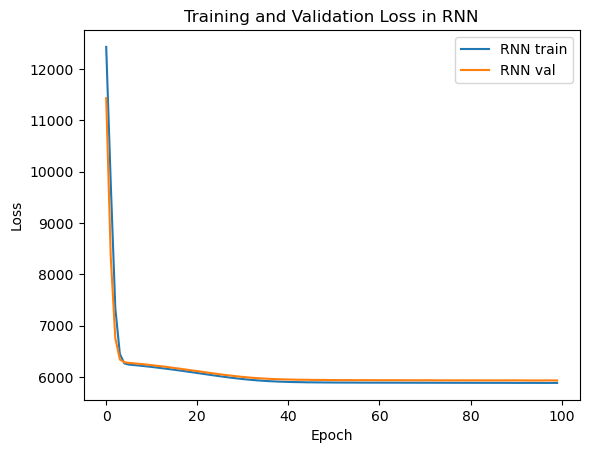

In [10]:
plt.plot(rnn_history.history['loss'], label='RNN train')
plt.plot(rnn_history.history['val_loss'], label='RNN val')
plt.title('Training and Validation Loss in RNN')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()